# Where do YOU stay in Seattle?
### Analysis on Airbnb-data in Seattle by Ramona Keller.

## Preliminary Wrangling:

> The dataset is part of the Airbnb inside published on the Kaggle Website. It contains prices on available Seattle accomodation between January 4th 2016 and January 2nd 2017 as well as details to all Airbnb-accomodations in Seattle with availability and scraped on January 4th 2016. Furthermore, reviews on the accomodations between June 7th 2009 and January 3rd 2016 are provided.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

## Data gathering

The data is provided in 3 different csv-files. They are read into dataframes first.

In [2]:
df_cal = pd.read_csv('calendar.csv')
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 26.6+ MB


The df_cal dataset contains 1,393,570 entries and gives for the listing and date the availability and the price. 

In [4]:
df_list = pd.read_csv('listings.csv')
df_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

The df_list dataset contains 3,818 entries with information on the accomodations.

In [6]:
df_rev = pd.read_csv('reviews.csv')
df_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [7]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 2.9+ MB


> The df_rev dataset contains 84,849 entries with details on reviews regarding the listings.

## Data assessment and cleaning

First, wrong data classification will be corrected.
The column 'date' in df_cal and df_rev are shown as objects but are indeed dates and have to be changed into datetimes. All colums related to prices in df_cal and df_list are shown as objects but are indeed currency numbers and have to be changed to floats in order to be properly analysed.

In [8]:
df_cal['date'] = df_cal['date'].apply(pd.to_datetime, format = '%Y-%m-%d', infer_datetime_format = True)

In [9]:
df_rev['date'] = df_rev['date'].apply(pd.to_datetime,format = '%Y-%m-%d', infer_datetime_format = True)

In [10]:
def clean_currency(x):
    """
    Conversion of Dollar currency numbers (objects) to float.
  
    This function looks for the currency sign "$" and commas that are commonly used for showing currency prices and
    removes them. With this function, these price values can be converted from objects to int or float.
  
    Parameters:
    x (object): number with potential currency sign "$" and thousand-sign ","
  
    Returns:
    int/float: Number without "$" or ","
  
    """
    if isinstance (x, str):
        return(x.replace('$','').replace(',',''))
    return (x)
df_cal['price'] = df_cal['price'].apply(clean_currency).astype('float')

In [11]:
df_list['price'] = df_list['price'].apply(clean_currency).astype('float')
df_list['weekly_price'] = df_list['weekly_price'].apply(clean_currency).astype('float')
df_list['monthly_price'] = df_list['monthly_price'].apply(clean_currency).astype('float')
df_list['security_deposit'] = df_list['security_deposit'].apply(clean_currency).astype('float')
df_list['cleaning_fee'] = df_list['cleaning_fee'].apply(clean_currency).astype('float')
df_list['extra_people'] = df_list['extra_people'].apply(clean_currency).astype('float')

First analysis is conducted to get familiar with the datasets.

In [12]:
print ('The df_cal dataset has ', sum(df_cal.duplicated()), 'duplicates.')
print ('The df_list dataset has ', sum(df_list.duplicated()), 'duplicates.')
print ('The df_rev dataset has ', sum(df_rev.duplicated()), 'duplicates.')

The df_cal dataset has  0 duplicates.
The df_list dataset has  0 duplicates.
The df_rev dataset has  0 duplicates.


In [13]:
print('The first review in the dataset was done on', df_rev['date'].min())
print('The last review in the dataset is from', df_rev['date'].max())

The first review in the dataset was done on 2009-06-07 00:00:00
The last review in the dataset is from 2016-01-03 00:00:00


In [14]:
print('The first availability entry in the dataset is from', df_cal['date'].min())
print('The last availability entry in the dataset is from', df_cal['date'].max())

The first availability entry in the dataset is from 2016-01-04 00:00:00
The last availability entry in the dataset is from 2017-01-02 00:00:00


In [15]:
df_cal.groupby(['available'])['price'].max()

available
f       NaN
t    1650.0
Name: price, dtype: float64

> The calendar dataset shows only prices if the accomodation is listed as t (true). The column can be changed to boolean with t = True and f = False.

In [16]:
df_cal['available'].replace({'t':True, 'f':False}, inplace = True)

In [17]:
df_list.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


> The listing database has columns with t / f as well. These will be changed to booleans with t = True and f = False.

In [18]:
df_list['host_has_profile_pic'].replace({'t':True, 'f':False}, inplace = True)
df_list['host_is_superhost'].replace({'t':True, 'f':False}, inplace = True)
df_list['host_identity_verified'].replace({'t':True, 'f':False}, inplace = True)
df_list['is_location_exact'].replace({'t':True, 'f':False}, inplace = True)
df_list['instant_bookable'].replace({'t':True, 'f':False}, inplace = True)
df_list['require_guest_profile_picture'].replace({'t':True, 'f':False}, inplace = True)
df_list['require_guest_phone_verification'].replace({'t':True, 'f':False}, inplace = True)

In [19]:
df_list['calendar_updated'].value_counts()

today            706
2 weeks ago      347
3 weeks ago      300
2 months ago     281
a week ago       248
yesterday        231
3 months ago     218
4 weeks ago      213
3 days ago       162
5 weeks ago      156
4 days ago       145
4 months ago     133
5 days ago       132
6 weeks ago      118
2 days ago        96
5 months ago      91
7 weeks ago       63
6 months ago      29
6 days ago        28
1 week ago        26
never             24
7 months ago      23
8 months ago      14
10 months ago      8
9 months ago       7
12 months ago      5
11 months ago      5
22 months ago      2
13 months ago      2
30 months ago      1
17 months ago      1
15 months ago      1
14 months ago      1
16 months ago      1
Name: calendar_updated, dtype: int64

> Looking at the column "calendar_updated", there are 2 phrases describing the same timestamp (a week ago and 1 week ago). With replacement, the different names will be aligned.

In [20]:
df_list['calendar_updated'].replace({'a week ago':'1 week ago'}, inplace = True)

In order to shorten the listing database, a copy will be created.

In [21]:
df  = df_list.copy()
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,False,moderate,False,False,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,False,strict,True,True,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,False,strict,False,False,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,False,flexible,False,False,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,False,strict,False,False,1,0.89


In [22]:
df.drop(columns = ['scrape_id', 'last_scraped', 'experiences_offered', 'has_availability', 
                   'jurisdiction_names', 'requires_license', 'license'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 85 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498 non-null object
host_id                             3818 non-null int64
host_url                            3818 non-null object
host_name                           3816

In [23]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null datetime64[ns]
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.2+ MB


In [24]:
df_rev['reviewer_id'].value_counts()

206203      67
15121499    32
5775807     19
2734499     19
29590276    18
            ..
31487463     1
13532646     1
9373300      1
28722657     1
22282240     1
Name: reviewer_id, Length: 75730, dtype: int64

In [25]:
df_rev.loc[df_rev['reviewer_id'] == 206203]

,listing_id,id,date,reviewer_id,reviewer_name,comments
2981,741699,6902331,2013-08-29,206203,Amanda,I stayed at the Seward Park Zen Retreat as a b...
3006,741699,10781810,2014-03-07,206203,Amanda,Matt's place is a wonderful retreat in an ecle...
3015,741699,11925465,2014-04-19,206203,Amanda,Matt is a friendly host and the Seward Park Ze...
3018,741699,12408205,2014-05-01,206203,Amanda,"The Zen Retreat is quiet, in a great neighborh..."
3063,741699,22453515,2014-11-07,206203,Amanda,The Zen Retreat is a great place to relax and ...
...,...,...,...,...,...,...
74904,10385,89229,2010-09-02,206203,Amanda,Nice accomodations. Great bed! Very nice peo...
76980,2472850,15533376,2014-07-11,206203,Amanda,Teagen is a responsive accommodating host and ...
77987,3293438,34725389,2015-06-11,206203,Amanda,"This is a great place, close to downtown, quie..."
79066,143704,912199,2012-02-10,206203,Amanda,"Julie's guest apartment is cute, clean, comfor..."


> There are 75,730 individual reviewers of Seattle accomodations. The highest number of reviews was 67 and done by Amanda.

In [26]:
df.guests_included.value_counts()

1     2275
2      989
4      237
0       92
3       80
6       71
5       28
8       24
7       14
9        2
10       2
15       1
13       1
11       1
12       1
Name: guests_included, dtype: int64

## Data Preparation, Exploration and Visualization

In order to properly compare the accommodation prices, the column "Price per guest" is created.

In [27]:
df['price_per_guest'] = df['price']/df['guests_included']
df.price_per_guest.value_counts()

75.000000     133
100.000000    123
50.000000     119
55.000000     108
150.000000     96
             ... 
37.800000       1
47.833333       1
24.833333       1
33.166667       1
43.888889       1
Name: price_per_guest, Length: 445, dtype: int64

For the first question "Which Area of Seattle is the most popular?", a reduced database is regarded with only information on the neighbourhood, some scores and the price per guest where the location is stated as exact. 

In [28]:
area = df[['neighbourhood_group_cleansed','latitude', 'longitude', 'price_per_guest', 'review_scores_rating','review_scores_location']].loc[df['is_location_exact'] == True]
area.dropna(inplace = True)
area.shape

(2868, 6)

The figure below shows the geographical location of the offered accommodations. A lot of accommodations are in the Center of Seattle indicated by a darker color.

<Figure size 1080x1080 with 0 Axes>

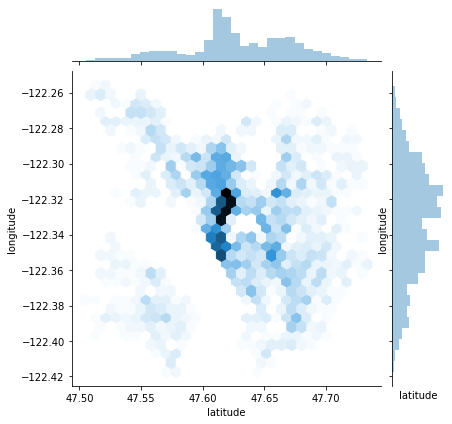

In [29]:
plt.figure(figsize=(15,15))
sns.jointplot(data=area, x="latitude",y="longitude", kind = 'hex')
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.show()

The figure below shows the geographical location of the offered accomodations with an indication of the price per guest per night via color. With the big size of accommodations close to each other, there is some overlapping. Most accommodations are similar with a price up to 500$ per guest night.

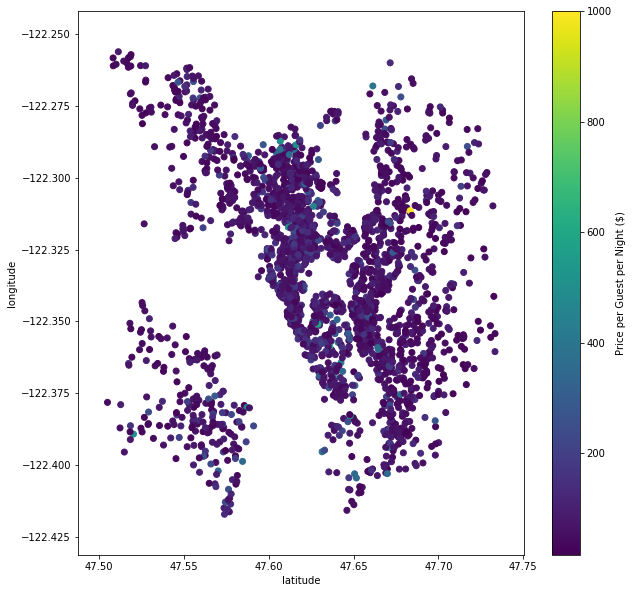

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(data = area, x = 'latitude', y = 'longitude', c = 'price_per_guest')
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.colorbar(label = 'Price per Guest per Night ($)')
plt.show()

The figures below shows the review point on the accommodations according to the location. Overall, the majority of accommodations has a high rating with no specific area standing out.

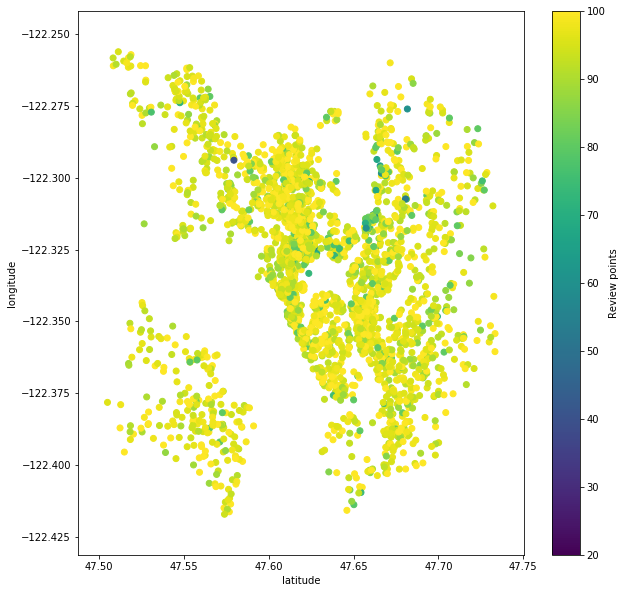

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(data = area, x = 'latitude', y = 'longitude', c = 'review_scores_rating')
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.colorbar(label = 'Review points')
plt.show()

With only looking at the location reviews there is a clear trend visible where a lot of high ranked accommodations are close together.

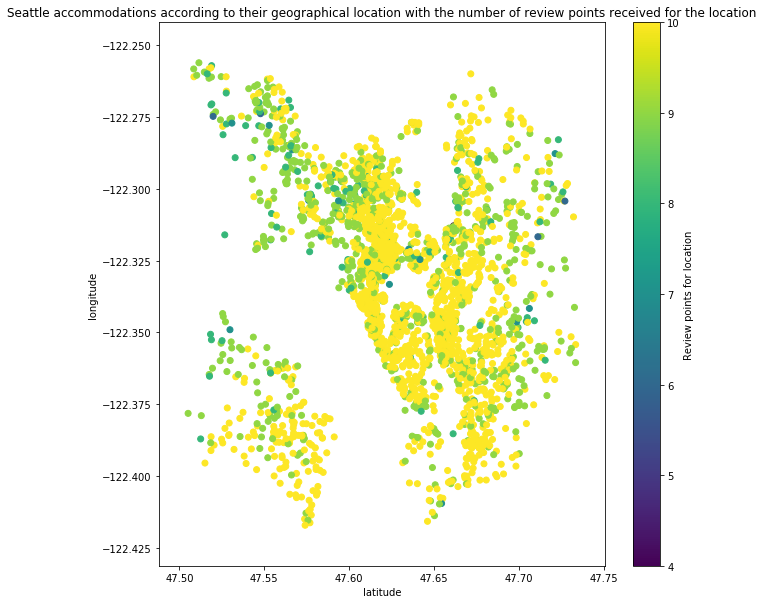

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(data = area, x = 'latitude', y = 'longitude', c = 'review_scores_location')
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.colorbar(label = 'Review points for location')
plt.title('Seattle accommodations according to their geographical location with the number of review points received for the location')
plt.show()

The figure below shows the number of accommodations according to the neigbourhood names. The most accommodations are in Capitol Hill (276 in total).

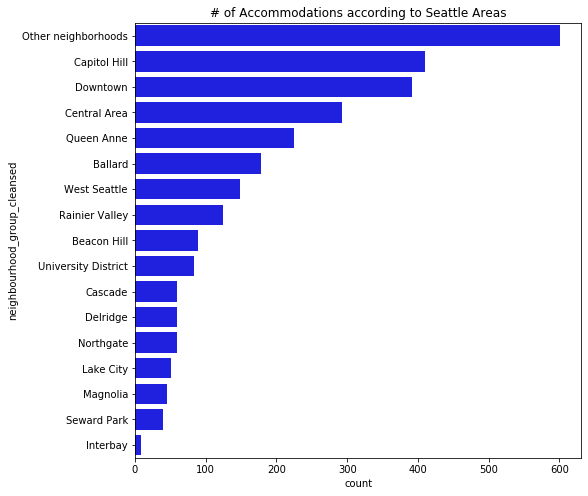

In [33]:
plt.figure(figsize=(8,8))
ax = sns.countplot(y='neighbourhood_group_cleansed', data=area, order = area['neighbourhood_group_cleansed'].value_counts().index, color = 'b')
ax.set_title('# of Accommodations according to Seattle Areas');

In [34]:
area['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    601
Capitol Hill           410
Downtown               392
Central Area           293
Queen Anne             225
Ballard                178
West Seattle           148
Rainier Valley         125
Beacon Hill             89
University District     84
Cascade                 60
Delridge                60
Northgate               60
Lake City               51
Magnolia                45
Seward Park             39
Interbay                 8
Name: neighbourhood_group_cleansed, dtype: int64

In [35]:
area.groupby(['neighbourhood_group_cleansed'])['review_scores_location'].mean()

neighbourhood_group_cleansed
Ballard                9.792135
Beacon Hill            9.089888
Capitol Hill           9.819512
Cascade                9.583333
Central Area           9.491468
Delridge               9.183333
Downtown               9.770408
Interbay               9.000000
Lake City              9.274510
Magnolia               9.600000
Northgate              9.316667
Other neighborhoods    9.645591
Queen Anne             9.768889
Rainier Valley         9.064000
Seward Park            9.282051
University District    9.202381
West Seattle           9.783784
Name: review_scores_location, dtype: float64

The figure below shows the rating of the accommodation locations. In general no worse rating than a 6 has been given leaving a high overall score. 

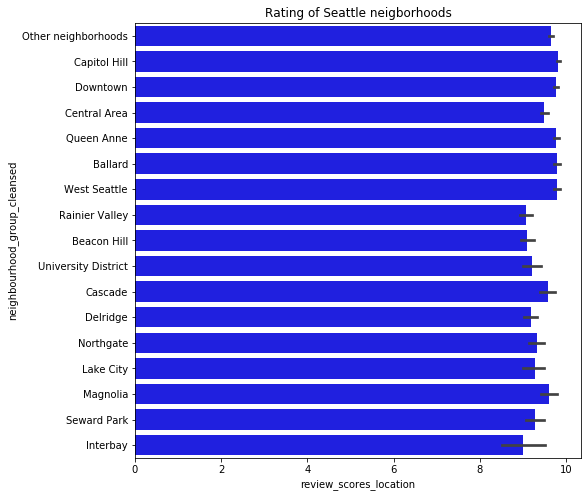

In [36]:
plt.figure(figsize=(8,8))
ax = sns.barplot(data=area, x='review_scores_location', y='neighbourhood_group_cleansed', order = area['neighbourhood_group_cleansed'].value_counts().index, color = 'b')
ax.set_title('Rating of Seattle neigborhoods');

In [37]:
pd.set_option('display.max_columns', None)
df.describe()

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,price_per_guest
count,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,2009.000000,1517.000000,1866.000000,2788.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3818.000000,3191.000000,3818.000000
mean,5.550111e+06,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,127.976166,788.481832,2613.336190,287.610397,61.710904,1.672603,10.667627,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.946307,2.078919,inf
std,2.962660e+06,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,90.250022,532.352269,1722.267981,270.222690,48.830341,1.311040,17.585922,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,5.893029,1.822348,NaN
min,3.335000e+03,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,100.000000,500.000000,95.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,0.020000,2.333333
25%,3.258256e+06,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,75.000000,455.000000,1512.000000,150.000000,25.000000,1.000000,0.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.695000,49.000000
50%,6.118244e+06,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,100.000000,650.000000,2200.000000,250.000000,50.000000,1.000000,0.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.540000,72.000000
75%,8.035127e+06,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,150.000000,950.000000,3150.000000,300.000000,83.000000,2.000000,20.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,3.000000,112.000000
max,1.034016e+07,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,1000.000000,6300.000000,19500.000000,5000.000000,300.000000,15.000000,300.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,37.000000,12.150000,inf


> There are NaNs in the columns: host_listings_count, host_total_listings_count, bathrooms, bedrooms, beds, square_feet, weekly_price, monthly_price, security_deposit, cleaning_fee, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_score_checkin, review_scores_communication, review_scores_location, review_scores_value, reviews_per_month.
> The columns bathrooms, bedrooms, beds shall be used for the price modelling and will therefore be filled.

> With a closer look on the missing bedroom accommodations, the majority is only for 2 people where it is possible that the bed is located e.g. in the living room. Taking the mean or the mode of bedrooms for these doesn't seem correct. Threfore, for all accommodations with missing bedrooms and 2 accommodates, 0 bedrooms will be assumed. For accommodates >2, 1 bedroom will be assumed.

In [38]:
df[df['bedrooms'].isna()]

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_per_guest
1429,1476298,https://www.airbnb.com/rooms/1476298,Live like a local - Walkscore 98!,NaN,You will love the location! Heart of Downtown....,You will love the location! Heart of Downtown....,The heart of Seattle's downtown,Please ask me in advance about reserving parking,"Easy access to bus, bikes, and light rail.",https://a0.muscache.com/ac/pictures/24393623/6...,https://a0.muscache.com/im/pictures/24393623/6...,https://a0.muscache.com/ac/pictures/24393623/6...,https://a0.muscache.com/ac/pictures/24393623/6...,453540,https://www.airbnb.com/users/show/453540,Sid,2011-03-20,Seattle,We are really excited about hosting you during...,within a few hours,86%,100%,False,https://a1.muscache.com/ac/users/453540/profil...,https://a1.muscache.com/ac/users/453540/profil...,Belltown,5.0,5.0,"['email', 'phone', 'google', 'reviews', 'jumio']",True,True,"Bell Street, Seattle, WA 98121, United States",Belltown,Belltown,Downtown,Seattle,WA,98121,Seattle,"Seattle, WA",US,United States,47.615070,-122.345919,True,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Wheelchair A...",NaN,80.0,1100.0,3590.0,NaN,30.0,2,25.0,1,1125,5 days ago,25,55,58,296,2016-01-04,170,2013-08-11,2015-12-22,94.0,9.0,10.0,10.0,10.0,10.0,9.0,True,strict,True,True,5,5.82,40.0
1492,604600,https://www.airbnb.com/rooms/604600,condo in seattle,studio (2 ppl) through 2 bedroom units (6 ppl)...,Please send message for availability. Price is...,studio (2 ppl) through 2 bedroom units (6 ppl)...,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/7620303/15...,https://a1.muscache.com/im/pictures/7620303/15...,https://a1.muscache.com/ac/pictures/7620303/15...,https://a1.muscache.com/ac/pictures/7620303/15...,103427,https://www.airbnb.com/users/show/103427,Magalie,2010-04-04,"West Hollywood, California, United States",Hi everyone!! I am a bay area native and I lov...,within a day,87%,100%,False,https://a1.muscache.com/ac/users/103427/profil...,https://a1.muscache.com/ac/users/103427/profil...,Anaheim,84.0,84.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",True,True,"9th Ave, Seattle, WA 98101, United States",Central Business District,Central Business District,Downtown,Seattle,WA,98101,Seattle,"Seattle, WA",US,United States,47.614364,-122.331716,True,Apartment,Entire home/apt,6,1.0,NaN,1.0,Real Bed,{},NaN,200.0,NaN,NaN,500.0,50.0,1,0.0,1,4,6 months ago,30,60,90,365,2016-01-04,1,2014-09-11,2014-09-11,100.0,10.0,10.0,10.0,10.0,10.0,10.0,False,strict,False,False,2,0.06,200.0
1493,1251763,https://www.airbnb.com/rooms/1251763,Studio Plus timeshare in Seattle WA,*** When booking a Friday or Saturday night st...,*Important: Contact me to tell me your preferr...,*** When booking a Fr

In [39]:
df['bedrooms'] = df.apply(
    lambda row: 0 if np.isnan(row['bedrooms']) and row['accommodates'] == 2 else row['bedrooms'],
    axis=1
)

In [40]:
df['bedrooms'].fillna(1, inplace = True)

In [41]:
df[df['bedrooms'].isna()]

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_per_guest


> There are listings in the dataset where no bathroom is stated. This is very uncommon and according to Internet research, spaces without a bathroom are possible but should be avoided (https://airhostsforum.com/t/improve-a-space-with-no-bathroom/1059/2). Therefore, the missing bathroom values will be replaced by the mode of the category. Accommodations with 0 bathrooms will not be changed.

In [42]:
df[df['bathrooms'].isna()]

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_per_guest
1242,19611,https://www.airbnb.com/rooms/19611,1 Bedroom Downtown Seattle Oasis,This central unit is perfect for anyone lookin...,Seattle Oasis Vacations proudly offer this wel...,This central unit is perfect for anyone lookin...,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/4b39eff5-6...,https://a2.muscache.com/im/pictures/4b39eff5-6...,https://a2.muscache.com/ac/pictures/4b39eff5-6...,https://a2.muscache.com/ac/pictures/4b39eff5-6...,74305,https://www.airbnb.com/users/show/74305,Darik,2010-01-27,"Kent, Washington, United States","My wife, Sally and I are excited for you to st...",within a few hours,94%,100%,False,https://a0.muscache.com/ac/users/74305/profile...,https://a0.muscache.com/ac/users/74305/profile...,Belltown,34.0,34.0,"['email', 'phone', 'facebook', 'linkedin', 're...",True,True,"3rd Ave, Seattle, WA 98121, United States",Belltown,Belltown,Downtown,Seattle,WA,98121,Seattle,"Seattle, WA",US,United States,47.615611,-122.345927,True,Apartment,Entire home/apt,4,NaN,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""W...",NaN,107.0,NaN,NaN,NaN,96.0,1,0.0,2,365,today,22,46,76,151,2016-01-04,26,2010-03-23,2015-11-12,87.0,9.0,9.0,10.0,9.0,9.0,8.0,False,strict,True,True,6,0.37,107.0
1314,59827,https://www.airbnb.com/rooms/59827,1 Bedroom Sweeping View Oasis,NaN,"Welcome to Seattle Oasis Vacations, your home ...","Welcome to Seattle Oasis Vacations, your home ...",NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/1e559a5c-7...,https://a2.muscache.com/im/pictures/1e559a5c-7...,https://a2.muscache.com/ac/pictures/1e559a5c-7...,https://a2.muscache.com/ac/pictures/1e559a5c-7...,74305,https://www.airbnb.com/users/show/74305,Darik,2010-01-27,"Kent, Washington, United States","My wife, Sally and I are excited for you to st...",within a few hours,94%,100%,False,https://a0.muscache.com/ac/users/74305/profile...,https://a0.muscache.com/ac/users/74305/profile...,Belltown,34.0,34.0,"['email', 'phone', 'facebook', 'linkedin', 're...",True,True,"3rd Ave, Seattle, WA 98121, United States",Belltown,Belltown,Downtown,Seattle,WA,98121,Seattle,"Seattle, WA",US,United States,47.616274,-122.344126,True,Apartment,Entire home/apt,4,NaN,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""W...",NaN,135.0,NaN,NaN,NaN,96.0,1,0.0,2,365,today,24,54,84,204,2016-01-04,13,2010-12-24,2015-12-20,87.0,9.0,9.0,9.0,9.0,9.0,8.0,True,strict,True,True,6,0.21,135.0
1357,19623,https://www.airbnb.com/rooms/19623,2 Bedroom Downtown Seattle Oasis,NaN,Seattle Oasis Vacations proudly offer this wel...,Seattle Oasis Vacations proudly offer this wel...,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/ca1083dd-0...,https://a2.muscache.com/im/pictures/ca1083dd-0...,ht

In [43]:
df['bathrooms'].fillna(df['bathrooms'].mode()[0], inplace = True)

In [44]:
df[df['bathrooms'].isna()]

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_per_guest


> There is one entry with a missing count of beds. Looking at the listing_url and the airbnb-site, 4 beds are stated on the webpage. Therefore, the missing value will be filled with 4.

In [45]:
df[df['beds'].isna()]

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_per_guest
1961,609252,https://www.airbnb.com/rooms/609252,Sans souci in Seattle,NaN,"In the Pacific Northwest's Emerald City, treat...","In the Pacific Northwest's Emerald City, treat...",NaN,NaN,NaN,https://a0.muscache.com/ac/pictures/7702323/12...,https://a0.muscache.com/im/pictures/7702323/12...,https://a0.muscache.com/ac/pictures/7702323/12...,https://a0.muscache.com/ac/pictures/7702323/12...,3018655,https://www.airbnb.com/users/show/3018655,Louise,2012-07-22,"Seattle, Washington, United States","Nature loving, independent, busy conference an...",within an hour,100%,NaN,False,https://a2.muscache.com/ac/users/3018655/profi...,https://a2.muscache.com/ac/users/3018655/profi...,Greenwood,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",True,True,"6th Ave NW, Seattle, WA 98117, United States",Greenwood,Greenwood,Other neighborhoods,Seattle,WA,98117,Seattle,"Seattle, WA",US,United States,47.698613,-122.363442,True,House,Private room,4,1.0,1.0,NaN,Real Bed,{},NaN,280.0,NaN,NaN,NaN,NaN,1,0.0,1,1125,5 months ago,30,60,90,365,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,flexible,False,False,2,NaN,280.0


In [46]:
df.iloc[1961, df.columns.get_loc('beds')] = 4

In [47]:
df['beds'].iloc[1961]

4.0

In [48]:
df[df['beds'].isna()]

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_per_guest


> There are missing values in the review_score_rating section. Most of them are when no review was given and the number_of_reviews was 0. There are only a few listings with 1 review and missing review scores. For modelling with these columns, the missing values should be dropped.

In [49]:
check_1 = df[df['review_scores_rating'].isna()]

In [50]:
check_1[check_1['number_of_reviews'] != 0]

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_per_guest
204,9028447,https://www.airbnb.com/rooms/9028447,Apartment on Lake Union downtown,This cool and modern one bedroom apartment has...,NaN,This cool and modern one bedroom apartment has...,NaN,NaN,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/cd24ecb4-f...,NaN,2704826,https://www.airbnb.com/users/show/2704826,Nate,2012-06-21,"Seattle, Washington, United States","34 yo male, young professional who likes to tr...",within a few hours,80%,100%,False,https://a2.muscache.com/ac/users/2704826/profi...,https://a2.muscache.com/ac/users/2704826/profi...,NaN,1.0,1.0,"['email', 'phone', 'facebook']",True,False,"8th Ave N, Seattle, WA 98109, United States",NaN,East Queen Anne,Queen Anne,Seattle,WA,98109,Seattle,"Seattle, WA",US,United States,47.639501,-122.343304,False,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,Heati...",NaN,100.0,NaN,NaN,NaN,NaN,1,0.0,1,1125,2 weeks ago,30,60,90,365,2016-01-04,1,2015-12-12,2015-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,moderate,False,False,1,1.00,100.00
283,5336585,https://www.airbnb.com/rooms/5336585,Beautiful Loft Apartment UW,I have a great loft apartment in the Wallingfo...,NaN,I have a great loft apartment in the Wallingfo...,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/ac/pictures/66669754/7...,NaN,27656377,https://www.airbnb.com/users/show/27656377,Alex,2015-02-12,"Seattle, Washington, United States",NaN,NaN,NaN,NaN,False,https://a2.muscache.com/ac/users/27656377/prof...,https://a2.muscache.com/ac/users/27656377/prof...,Wallingford,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",True,True,"Meridian Avenue North, Seattle, WA 98103, Unit...",Wallingford,Wallingford,Other neighborhoods,Seattle,WA,98103,Seattle,"Seattle, WA",US,United States,47.661669,-122.333743,True,Loft,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{Internet,Kitchen,""Smoking Allowed"",""Pets Allo...",NaN,75.0,NaN,NaN,NaN,NaN,1,0.0,1,1125,never,0,0,25,300,2016-01-04,1,2015-03-07,2015-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,flexible,False,False,1,0.10,75.00
361,8207848,https://www.airbnb.com/rooms/8207848,2BR/1BA Open-Concept Condo,No need for a car on your Seattle vacation! Ou...,"Our 2BR/1BA condo, with its fantastic hillside...",No need for a car on your Seattle vacation! Ou...,"We're right on the Metro Transit bus route, wi...",NaN,NaN,https://a0.muscache.com/ac/pictures/104463497/...,https://a0.muscache.com/im/pictures/104463497/...,https://a0.muscache.com/ac/pictures/104463497/...,https://a0.muscache.com/ac/pictures/104463497/...,31148752,https://www.airbnb.com/users/show/31148752,Bo,2015-04-13,US,NaN,within a few hours,99%,100%,False,https://a2.muscache.com/ac/users/31148752/prof...,https://a2.muscach

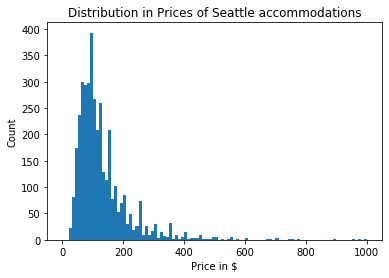

In [51]:
bin_edges = np.arange(0, df['price'].max()+10, 10)
plt.hist(data=df, x='price', bins = bin_edges)
plt.title('Distribution in Prices of Seattle accommodations')
plt.xlabel('Price in $')
plt.ylabel('Count');

In [52]:
print(df['price'].min())
print(df['price'].max())
print(df['price'].mean())
print(df['price'].mode())

20.0
1000.0
127.97616553169199
0    150.0
dtype: float64


In [53]:
df.describe()

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,price_per_guest
count,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,97.000000,3818.000000,2009.000000,1517.000000,1866.000000,2788.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3818.000000,3191.000000,3818.000000
mean,5.550111e+06,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.258381,1.306181,1.735987,854.618557,127.976166,788.481832,2613.336190,287.610397,61.710904,1.672603,10.667627,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.946307,2.078919,inf
std,2.962660e+06,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.589369,0.883742,1.139920,671.404893,90.250022,532.352269,1722.267981,270.222690,48.830341,1.311040,17.585922,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,5.893029,1.822348,NaN
min,3.335000e+03,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,100.000000,500.000000,95.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,0.020000,2.333333
25%,3.258256e+06,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,75.000000,455.000000,1512.000000,150.000000,25.000000,1.000000,0.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.695000,49.000000
50%,6.118244e+06,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,100.000000,650.000000,2200.000000,250.000000,50.000000,1.000000,0.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.540000,72.000000
75%,8.035127e+06,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,150.000000,950.000000,3150.000000,300.000000,83.000000,2.000000,20.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,3.000000,112.000000
max,1.034016e+07,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,1000.000000,6300.000000,19500.000000,5000.000000,300.000000,15.000000,300.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,37.000000,12.150000,inf


Next, the price will be predicted according to the accommodation specifics.

In [54]:
df_new = df[['price','accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating' ]]
df_new.dropna(inplace = True)
df_new.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(3171, 11)

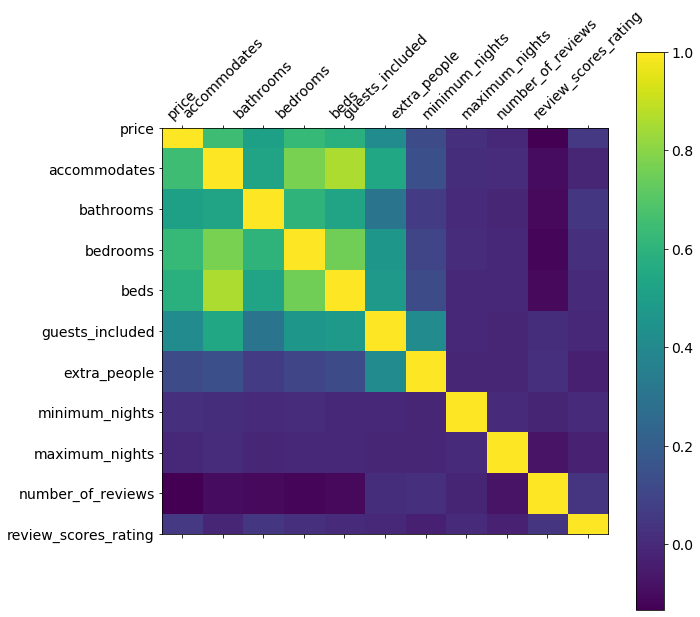

In [55]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df_new.corr(), fignum=f.number)
plt.xticks(range(df_new.select_dtypes(['number']).shape[1]), df_new.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_new.select_dtypes(['number']).shape[1]), df_new.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14);

In [56]:
df_new.corr()

,price,accommodates,bathrooms,bedrooms,beds,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
price,1.000000,0.648382,0.509689,0.627715,0.584570,0.415353,0.130667,0.018167,-0.002336,-0.133654,0.055551
accommodates,0.648382,1.000000,0.527025,0.770342,0.861727,0.544220,0.142475,0.015401,0.008894,-0.094329,-0.013101
bathrooms,0.509689,0.527025,1.000000,0.605306,0.527317,0.301129,0.066717,0.002911,-0.012474,-0.104011,0.045895
bedrooms,0.627715,0.770342,0.605306,1.000000,0.753171,0.468302,0.102979,0.009885,-0.005454,-0.119147,0.023115
beds,0.584570,0.861727,0.527317,0.753171,1.000000,0.476172,0.129696,-0.000821,-0.006770,-0.104056,-0.000720
guests_included,0.415353,0.544220,0.301129,0.468302,0.476172,1.000000,0.413498,-0.002836,-0.010557,0.013715,-0.001430
extra_people,0.130667,0.142475,0.066717,0.102979,0.129696,0.413498,1.000000,-0.012733,-0.010024,0.024037,-0.035063
minimum_nights,0.018167,0.015401,0.002911,0.009885,-0.000821,-0.002836,-0.012733,1.000000,0.004880,-0.015355,0.001392
maximum_nights,-0.002336,0.008894,-0.012474,-0.005454,-0.006770,-0.010557,-0.010024,0.004880,1.000000,-0.075463,-0.031313
number_of_reviews,-0.133654,-0.094329,-0.104011,-0.119147,-0.104056,0.013715,0.024037,-0.015355,-0.075463,1.000000,0.036242


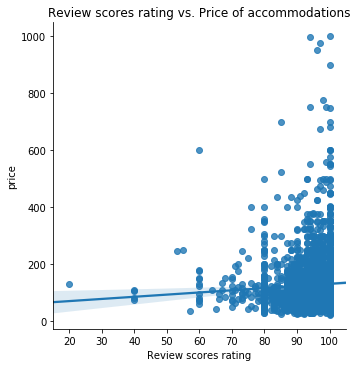

In [57]:
sns.lmplot(x="review_scores_rating", y="price", data=df_new)
ax = plt.gca()
ax.set_title('Review scores rating vs. Price of accommodations')
ax.set_xlabel('Review scores rating');

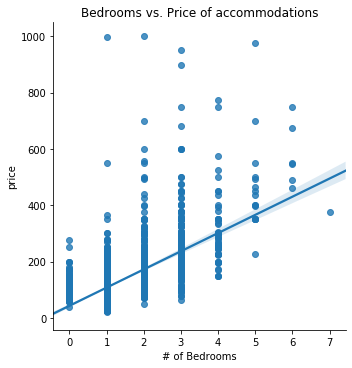

In [58]:
sns.lmplot(x="bedrooms", y="price", data=df_new)
ax = plt.gca()
ax.set_title('Bedrooms vs. Price of accommodations')
ax.set_xlabel('# of Bedrooms');

> With the correlation matrix in mind, only the quatitative variables 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'extra_people', 'review_scores_rating' are taken into account to predict the price.

In [59]:
y = df_new[['price']]
X = df_new[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'extra_people', 'review_scores_rating']]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

In [61]:
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)
        
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model was 0.5108752187140233 on 952 values.'

> The quantitative variables reach a r-squared value of 0.51. To improve the model, further qualitative variables are taken into account.

In [62]:
def clean_data(df):
    """
    Cleaning of dataframe for modelling.
  
    This function creates dummy variables for any column in the predictive variable set X_vals that has the type "object"
    in order to be used in the linear regression model.
  
    Parameters:
    df: dataframe to clean for modelling
  
    Returns:
    y: Variable to predict by linear regression model.
    X: Variables for prediction.
  
    """
    df_new2 = df.dropna(subset=['review_scores_rating'])
    y = df_new2[['price']]
    X_vals = df_new2[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'extra_people', 
             'review_scores_rating', 'instant_bookable', 'calendar_last_scraped', 'neighbourhood_group_cleansed', 
                      'property_type', 'room_type', 'bed_type', 'cancellation_policy', 'host_is_superhost']]
    cat_vars = X_vals.select_dtypes(include = 'object').columns
    for val in cat_vars:
        X_vals = pd.concat([X_vals.drop(val, axis = 1),pd.get_dummies(X_vals[val], prefix = val, 
                                                                      prefix_sep = '_', drop_first = True)], axis = 1)
    X = X_vals
    return X, y
X, y = clean_data(df)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)
        
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model was 0.5980956772317144 on 952 values.'

> With qualitative variables, the model can be improved to a r-squared value of 0.60.

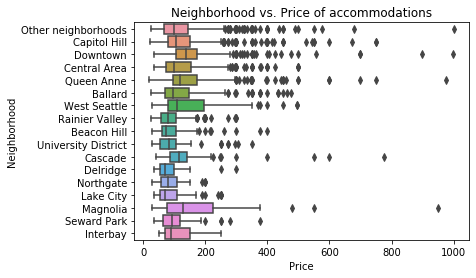

In [64]:
sns.boxplot(x="price", y="neighbourhood_group_cleansed", data=df, order = area['neighbourhood_group_cleansed'].value_counts().index)
ax = plt.gca()
ax.set_title('Neighborhood vs. Price of accommodations')
ax.set_xlabel('Price')
ax.set_ylabel('Neighborhood');

This analysis gives a small insight on the airbnb accommodation situation in 2016 and on the influences of the accommodations prices. Nevertheless, the r-squared value of the price model could be improved by further analysis and also back-tested with the calendar data. Further questions like "what is the best time to visit Seattle?" could be also posted and analysed with this data. The influence of reviews on the price was lower than expected but could be analysed futher by including the development of reviews in df_rev.